<a href="https://colab.research.google.com/github/aimerou/deep-learning/blob/main/notebooks/car_classification_and_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# glob
from glob import glob
# opencv
import cv2
# import model
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input, GlobalAveragePooling2D

In [4]:
# Upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"amroundiaye","key":"c533010ff0cce97de595cf4fc33e15ef"}'}

In [5]:
# Create directory for kaggle.json file
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

stanford-car-dataset-by-classes-folder.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir stanford-car-dataset
!unzip stanford-car-dataset-by-classes-folder.zip -d stanford-car-dataset

In [1]:
!ls stanford-car-dataset

anno_test.csv  anno_train.csv  car_data  names.csv


In [2]:
train_dir = 'stanford-car-dataset/car_data/car_data/train/'
test_dir =  'stanford-car-dataset/car_data/car_data/test/'

In [3]:
train_df = pd.read_csv('stanford-car-dataset/anno_train.csv', names=['image_name','x1','y1','x2','y2','car'])
test_df = pd.read_csv('stanford-car-dataset/anno_test.csv', names=['image_name','x1','y1','x2','y2','car'])
names_df = pd.read_csv('stanford-car-dataset/names.csv',names=['names'])
names = names_df['names'].values.tolist()

In [4]:
names[173] = 'Ram C-V Cargo Van Minivan 2012'

In [5]:
train_df.head()

,image_name,x1,y1,x2,y2,car
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


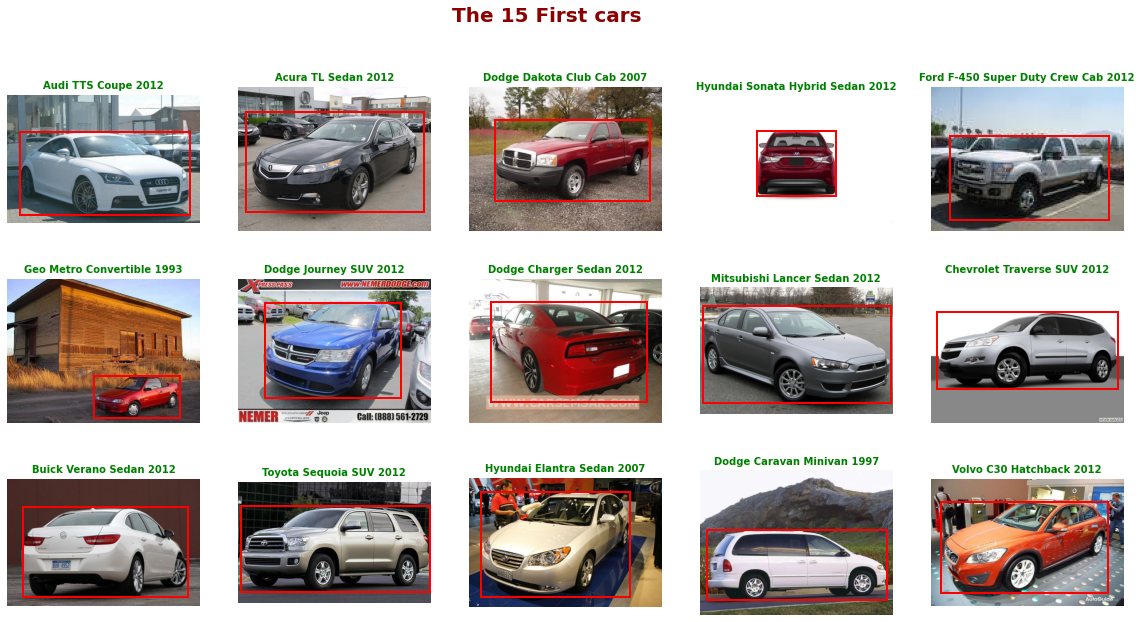

In [6]:
# Visualize 15 first cars and their bounding boxes
plt.figure(figsize=(20,10))
for i in range(15):
    car_index = train_df['car'][i] - 1
    folder = car = names[car_index]
    image_name = train_df['image_name'][i]
    x1 = train_df['x1'][i]
    y1 = train_df['y1'][i]
    x2 = train_df['x2'][i]
    y2 = train_df['y2'][i]
    width = x2 - x1
    height = y2 - y1
    plt.subplot(3,5,i+1)
    img = load_img(os.path.join(train_dir, folder, image_name))
    plt.imshow(img)
    ax = plt.gca()
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.title(car, color = "green", fontsize = 10 , fontweight = 600)
    plt.axis("off")
plt.suptitle("The 15 First cars", fontsize = 20 , color = "darkred", fontweight = 'bold')
plt.show()

In [7]:
img = load_img(train_dir + 'Audi TTS Coupe 2012/00001.jpg')
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

Image Shape -->  (400, 600, 3)


In [8]:
carCountUnique = glob(train_dir + '/*' )
numberOfClass = len(carCountUnique)
print("Number of car classes  -->  ",numberOfClass)

Number of car classes  -->   196
